In [1]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [2]:
df_verkehr_stjohann = pd.read_pickle("../data/clean/df_verkehr_stjohann.pkl")

In [3]:
df_verkehr_stjohann = df_verkehr_stjohann.set_index("timestamp")

In [4]:
df_basel_bin = pd.read_pickle("../data/clean/df_basel_bin.pkl")

In [5]:
df_basel_bin = df_basel_bin.set_index("timestamp")

In [6]:
df_basel_wetter = pd.read_pickle("../data/clean/df_basel_wetter.pkl")

In [7]:
df_basel_wetter = df_basel_wetter.set_index("timestamp")

In [8]:
df_basel_wetter.head()

temp  humidity  pressure  precipitation  cloudcover  \
timestamp                                                                      
2014-01-01 00:00:00  1.690529      45.0    1017.8            0.0        17.0   
2014-01-01 01:00:00  2.080528      41.0    1018.1            0.0       100.0   
2014-01-01 02:00:00  2.130529      39.0    1018.0            0.0       100.0   
2014-01-01 03:00:00  3.320529      42.0    1017.2            0.0       100.0   
2014-01-01 04:00:00  5.190528      56.0    1016.3            0.0       100.0   

                     sunshine_duration  shortwave_radiation  wind_speed  \
timestamp                                                                 
2014-01-01 00:00:00                0.0                  0.0    5.145039   
2014-01-01 01:00:00                0.0                  0.0    5.491976   
2014-01-01 02:00:00                0.0                  0.0    5.361196   
2014-01-01 03:00:00                0.0                  0.0    4.144211   
2014-01-01 04:00:00                0.0                  0.0    3.463200   

                     wind_direction  
timestamp                            
2014-01-01 00:00:00       111.25050  
2014-01-01 01:00:00       104.03624  
2014-01-01 02:00:00       116.56505  
2014-01-01 03:00:00       135.00000  
2014-01-01 04:00:00       180.00000

In [9]:
df_basel_bin.head()

O3   NO2  SO2  PM10  PM2.5   EC      CPC   NOX  TEMP  \
timestamp                                                                    
2014-01-01 01:00:00  7.1  36.7  5.3  35.6    NaN  1.4  17257.8  43.2   0.5   
2014-01-01 02:00:00  4.7  35.5  6.3  57.3    NaN  1.5  20101.9  47.1   0.3   
2014-01-01 03:00:00  3.1  33.9  3.9  69.1    NaN  1.3  14095.9  42.4   0.2   
2014-01-01 04:00:00  1.9  33.8  3.2  48.4    NaN  1.3  13157.1  45.8   0.2   
2014-01-01 05:00:00  2.7  33.5  2.8  41.6    NaN  1.2  11711.8  41.0   0.6   

                     PREC  RAD  
timestamp                       
2014-01-01 01:00:00   0.0  0.0  
2014-01-01 02:00:00   0.0  0.0  
2014-01-01 03:00:00   0.0  0.0  
2014-01-01 04:00:00   0.1  0.0  
2014-01-01 05:00:00   0.0  0.0

In [10]:
df_verkehr_stjohann.head()

SiteCode                           SiteName  \
timestamp                                                          
2014-08-12 01:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2014-08-12 02:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2014-08-12 03:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2014-08-12 04:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2014-08-12 05:00:00       660  660 Flughafenstrasse, Grenze CH-F   

                                         DirectionName  LaneCode LaneName  \
timestamp                                                                   
2014-08-12 01:00:00  1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2014-08-12 02:00:00  1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2014-08-12 03:00:00  1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2014-08-12 04:00:00  1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2014-08-12 05:00:00  1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   

                           Date TimeFrom TimeTo  ValuesApproved  ValuesEdited  \
timestamp                                                                       
2014-08-12 01:00:00  12.08.2014    00:00  01:00               1             1   
2014-08-12 02:00:00  12.08.2014    01:00  02:00               1             1   
2014-08-12 03:00:00  12.08.2014    02:00  03:00               1             1   
2014-08-12 04:00:00  12.08.2014    03:00  04:00               1             1   
2014-08-12 05:00:00  12.08.2014    04:00  05:00               1             1   

                      ...    PW  PW+  Lief  Lief+  Lief+Aufl.  LW  LW+  \
timestamp             ...                                                
2014-08-12 01:00:00   ...    42    0     2      0           0   0    0   
2014-08-12 02:00:00   ...     2    0     1      0           0   0    0   
2014-08-12 03:00:00   ...     5    0     0      0           0   0    0   
2014-08-12 04:00:00   ...    13    0     4      0           0   0    0   
2014-08-12 05:00:00   ...    48    0     6      0           0   2    0   

                     Sattelzug  Bus  andere  
timestamp                                    
2014-08-12 01:00:00          0    3       0  
2014-08-12 02:00:00          0    0       0  
2014-08-12 03:00:00          0    0       0  
2014-08-12 04:00:00          0    0       0  
2014-08-12 05:00:00          0    1       0  

[5 rows x 23 columns]

Issue: All three dataframes have different starting timestamps. Only merge data within common timestamp range

In [11]:
[df_verkehr_stjohann.index.max(), df_basel_bin.index.max(), df_basel_wetter.index.max()]

[Timestamp('2020-05-04 23:00:00'),
 Timestamp('2020-05-04 00:00:00'),
 Timestamp('2020-05-03 23:00:00')]

In [12]:
[df_verkehr_stjohann.index.min(), df_basel_bin.index.min(), df_basel_wetter.index.min()]

[Timestamp('2014-08-12 00:00:00'),
 Timestamp('2014-01-01 01:00:00'),
 Timestamp('2014-01-01 00:00:00')]

Check if columns with same names exist before merging dataframes

In [13]:
df_basel_wetter.columns

Index(['temp', 'humidity', 'pressure', 'precipitation', 'cloudcover',
       'sunshine_duration', 'shortwave_radiation', 'wind_speed',
       'wind_direction'],
      dtype='object')

In [14]:
df_basel_bin.columns

Index(['O3', 'NO2', 'SO2', 'PM10', 'PM2.5', 'EC', 'CPC', 'NOX', 'TEMP', 'PREC',
       'RAD'],
      dtype='object')

In [15]:
df_basel_wetter.shape

(55560, 9)

In [16]:
df_basel_bin.shape

(55560, 11)

In [17]:
df_verkehr_stjohann.shape

(97632, 23)

In [18]:
df_verkehr_stjohann.loc['01.01.2016']

SiteCode                           SiteName  \
timestamp                                                          
2016-01-01 01:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 02:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 03:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 04:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 05:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 06:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 07:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 08:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 09:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 10:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 11:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 12:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 13:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 14:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 15:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 16:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 17:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 18:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 19:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 20:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 21:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 22:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 23:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 00:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 01:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 02:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 03:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 04:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 05:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 06:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 07:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 08:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 09:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 10:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 11:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 12:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 13:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 14:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 15:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 16:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 17:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 18:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 19:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 20:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 21:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 22:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 23:00:00       660  660 Flughafenstrasse, Grenze CH-F   
2016-01-01 00:00:00       660  660 Flughafenstrasse, Grenze CH-F   

                                          DirectionName  LaneCode LaneName  \
timestamp                                                                    
2016-01-01 01:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2016-01-01 02:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2016-01-01 03:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2016-01-01 04:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2016-01-01 05:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1   
2016-01-01 06:00:00   1 von Flughafen (1 FS mit ÖV-Bus)         1   Spur 1

traffic data has two lanes (Spur 1, Spur 2)

In [19]:
df_verkehr_stjohann[df_verkehr_stjohann.LaneName == "Spur 1"].loc['2014-01-01 01:00:00' : '2020-05-03 23:00:00'].Total

timestamp
2014-08-12 01:00:00     48
2014-08-12 02:00:00      3
2014-08-12 03:00:00      6
2014-08-12 04:00:00     17
2014-08-12 05:00:00     57
2014-08-12 06:00:00    176
2014-08-12 07:00:00    119
2014-08-12 08:00:00    100
2014-08-12 09:00:00    140
2014-08-12 10:00:00    139
2014-08-12 11:00:00    214
2014-08-12 12:00:00    345
2014-08-12 13:00:00    262
2014-08-12 14:00:00    181
2014-08-12 15:00:00    207
2014-08-12 16:00:00    255
2014-08-12 17:00:00    468
2014-08-12 18:00:00    575
2014-08-12 19:00:00    459
2014-08-12 20:00:00    258
2014-08-12 21:00:00    193
2014-08-12 22:00:00    220
2014-08-12 23:00:00    239
2014-08-12 00:00:00    328
2014-08-13 01:00:00     62
2014-08-13 02:00:00     13
2014-08-13 03:00:00      4
2014-08-13 04:00:00     17
2014-08-13 05:00:00     96
2014-08-13 06:00:00    141
                      ... 
2020-05-02 19:00:00     15
2020-05-02 20:00:00     14
2020-05-02 21:00:00     15
2020-05-02 22:00:00     16
2020-05-02 23:00:00     12
2020-05-02 00:00:0

In [20]:
df_basel_bin.loc['2014-01-01 01:00:00' : '2020-05-03 23:00:00'].shape

(55559, 11)

In [21]:
df_basel_wetter.loc['2014-01-01 01:00:00' : '2020-05-03 23:00:00'].shape

(55559, 9)

In [22]:
df_all = df_basel_bin.join(df_verkehr_stjohann[df_verkehr_stjohann.LaneName == "Spur 1"].Total, how="inner")

In [23]:
df_all.rename(columns={'Total':'TrafficIn'}, inplace=True)

In [24]:
df_all.head()

O3   NO2  SO2  PM10  PM2.5   EC     CPC   NOX  TEMP  \
timestamp                                                                    
2014-08-12 00:00:00  47.7   4.4  0.3   7.6    NaN  0.1  3616.1   4.6  14.6   
2014-08-12 01:00:00  44.7   5.7  0.4   8.4    NaN  0.1  4250.2   5.9  14.6   
2014-08-12 02:00:00  37.5  10.2  0.5   9.6    NaN  0.2  5239.0  10.5  14.3   
2014-08-12 03:00:00  25.4  15.5  1.0  14.6    NaN  0.2  7199.5  15.9  13.6   
2014-08-12 04:00:00  25.5  11.8  0.9  12.6    NaN  0.4  6644.1  12.2  13.6   

                     PREC  RAD  TrafficIn  
timestamp                                  
2014-08-12 00:00:00   0.0  0.0        328  
2014-08-12 01:00:00   0.0  0.0         48  
2014-08-12 02:00:00   0.0  0.0          3  
2014-08-12 03:00:00   0.0  0.0          6  
2014-08-12 04:00:00   0.0  0.0         17

In [25]:
df_all = df_all.join(df_verkehr_stjohann[df_verkehr_stjohann.LaneName == "Spur 2"].Total, how="inner")

In [26]:
df_all.rename(columns={'Total':'TrafficOut'}, inplace=True)

In [27]:
df_all = df_all.join(df_basel_wetter, how="inner")

In [28]:
df_all = df_all.drop(["TEMP", "PREC", "RAD"], axis=1)

In [29]:
df_all.head()

O3   NO2  SO2  PM10  PM2.5   EC     CPC   NOX  \
timestamp                                                              
2014-08-12 00:00:00  47.7   4.4  0.3   7.6    NaN  0.1  3616.1   4.6   
2014-08-12 01:00:00  44.7   5.7  0.4   8.4    NaN  0.1  4250.2   5.9   
2014-08-12 02:00:00  37.5  10.2  0.5   9.6    NaN  0.2  5239.0  10.5   
2014-08-12 03:00:00  25.4  15.5  1.0  14.6    NaN  0.2  7199.5  15.9   
2014-08-12 04:00:00  25.5  11.8  0.9  12.6    NaN  0.4  6644.1  12.2   

                     TrafficIn  TrafficOut       temp  humidity  pressure  \
timestamp                                                                   
2014-08-12 00:00:00        328          56  18.010529      57.0    1015.4   
2014-08-12 01:00:00         48          12  17.760529      56.0    1015.8   
2014-08-12 02:00:00          3           2  17.550530      57.0    1016.0   
2014-08-12 03:00:00          6           6  17.430529      60.0    1015.6   
2014-08-12 04:00:00         17          28  17.040530      64.0    1015.2   

                     precipitation  cloudcover  sunshine_duration  \
timestamp                                                           
2014-08-12 00:00:00            0.0       100.0                0.0   
2014-08-12 01:00:00            0.0       100.0                0.0   
2014-08-12 02:00:00            0.0       100.0                0.0   
2014-08-12 03:00:00            0.0       100.0                0.0   
2014-08-12 04:00:00            0.0       100.0                0.0   

                     shortwave_radiation  wind_speed  wind_direction  
timestamp                                                             
2014-08-12 00:00:00                  0.0    5.394189       200.22485  
2014-08-12 01:00:00                  0.0    2.513213       237.99463  
2014-08-12 02:00:00                  0.0    2.781298       196.69925  
2014-08-12 03:00:00                  0.0    2.623736       203.96250  
2014-08-12 04:00:00                  0.0    3.996000       216.86990

In [30]:
df_all['PM2.5'].isna().value_counts()

False    36810
True     11982
Name: PM2.5, dtype: int64

In [31]:
df_all['PM10'].isna().value_counts()

False    46457
True      2335
Name: PM10, dtype: int64

In [32]:
df_all['O3'].isna().value_counts()

False    48522
True       270
Name: O3, dtype: int64

In [33]:
df_all['EC'].isna().value_counts()

False    48518
True       274
Name: EC, dtype: int64

In [34]:
df_all['CPC'].isna().value_counts()

False    48699
True        93
Name: CPC, dtype: int64

In [35]:
df_all['NOX'].isna().value_counts()

False    48536
True       256
Name: NOX, dtype: int64

In [36]:
nominal_columns_missing = df_all.columns[0:8]

In [37]:
impute_missing=KNNImputer()

In [38]:
df_all['NOX'].reset_index()

timestamp   NOX
0     2014-08-12 00:00:00   4.6
1     2014-08-12 01:00:00   5.9
2     2014-08-12 02:00:00  10.5
3     2014-08-12 03:00:00  15.9
4     2014-08-12 04:00:00  12.2
5     2014-08-12 05:00:00  16.2
6     2014-08-12 06:00:00  31.2
7     2014-08-12 07:00:00  67.3
8     2014-08-12 08:00:00  79.1
9     2014-08-12 09:00:00  63.3
10    2014-08-12 10:00:00  14.3
11    2014-08-12 11:00:00   4.4
12    2014-08-12 12:00:00   NaN
13    2014-08-12 13:00:00   5.3
14    2014-08-12 14:00:00   4.8
15    2014-08-12 15:00:00   4.1
16    2014-08-12 16:00:00   2.8
17    2014-08-12 17:00:00   5.2
18    2014-08-12 18:00:00   6.0
19    2014-08-12 19:00:00   5.1
20    2014-08-12 20:00:00   5.7
21    2014-08-12 21:00:00   7.7
22    2014-08-12 22:00:00   9.4
23    2014-08-12 23:00:00  14.7
24    2014-08-13 00:00:00  19.9
25    2014-08-13 01:00:00  16.7
26    2014-08-13 02:00:00  14.6
27    2014-08-13 03:00:00  14.0
28    2014-08-13 04:00:00  16.1
29    2014-08-13 05:00:00  18.1
...                   ...   ...
48762 2020-05-02 18:00:00   5.0
48763 2020-05-02 19:00:00   4.1
48764 2020-05-02 20:00:00   2.1
48765 2020-05-02 21:00:00   3.7
48766 2020-05-02 22:00:00   6.4
48767 2020-05-02 23:00:00  12.8
48768 2020-05-03 00:00:00  11.7
48769 2020-05-03 01:00:00  10.4
48770 2020-05-03 02:00:00  10.4
48771 2020-05-03 03:00:00   8.5
48772 2020-05-03 04:00:00   6.9
48773 2020-05-03 05:00:00   6.6
48774 2020-05-03 06:00:00   6.8
48775 2020-05-03 07:00:00   7.5
48776 2020-05-03 08:00:00   7.8
48777 2020-05-03 09:00:00  10.1
48778 2020-05-03 10:00:00   9.1
48779 2020-05-03 11:00:00   4.5
48780 2020-05-03 12:00:00   3.1
48781 2020-05-03 13:00:00   2.0
48782 2020-05-03 14:00:00   2.9
48783 2020-05-03 15:00:00   2.3
48784 2020-05-03 16:00:00   2.5
48785 2020-05-03 17:00:00   2.3
48786 2020-05-03 18:00:00   3.0
48787 2020-05-03 19:00:00   2.4
48788 2020-05-03 20:00:00   NaN
48789 2020-05-03 21:00:00   NaN
48790 2020-05-03 22:00:00   NaN
48791 2020-05-03 23:00:00   NaN

[48792 rows x 2 columns]

In [39]:
impute_missing.fit_transform([df_all['PM2.5']]).shape

(1, 36810)

In [40]:
nominal_columns_missing

Index(['O3', 'NO2', 'SO2', 'PM10', 'PM2.5', 'EC', 'CPC', 'NOX'], dtype='object')

In [41]:
np.squeeze(impute_missing.fit_transform([df_all['O3']])).shape

(48522,)

In [42]:
df_all['O3'].shape

(48792,)

In [43]:
#for col in nominal_columns_missing:
#    print(col)
#    df_all[col] = np.squeeze(impute_missing.fit_transform([df_all['O3']]))

In [44]:
df_all['NOX'].isna().value_counts()


False    48536
True       256
Name: NOX, dtype: int64

In [45]:
df_all['hour'] = df_all.index.hour

In [46]:
df_all['weekday'] = df_all.index.weekday

In [47]:
df_all['month'] = df_all.index.month

In [48]:
df_all['year'] = df_all.index.year

In [49]:
df_all['day'] = df_all.index.day

In [50]:
df_all.sample(n=20)

O3   NO2  SO2  PM10  PM2.5   EC      CPC   NOX  \
timestamp                                                                
2017-01-21 16:00:00   28.5  40.7  1.0  42.5   38.4  1.2   9013.7  58.0   
2016-09-08 05:00:00   34.3  18.4  2.6  10.7    8.1  0.3   8551.1  18.5   
2015-08-31 15:00:00  117.6   2.1  0.5  39.4    NaN  0.2   3843.1   2.4   
2018-09-02 22:00:00   41.7  13.2  0.4   7.7    6.0  0.3   7512.0  13.5   
2017-05-11 22:00:00   65.9   6.6  0.5   6.4    4.7  0.2   5105.4   6.9   
2014-11-14 05:00:00   13.5  18.6  0.6  14.8    NaN  0.4   3361.6  19.0   
2018-07-28 19:00:00  105.5   3.2  0.2   7.2    6.8  0.2   3464.0   3.4   
2015-04-12 04:00:00   22.5  28.7  3.8  12.7    NaN  0.9  11535.5  29.4   
2018-08-22 05:00:00   63.5  13.3  1.9  13.1   10.6  0.3   6604.7  13.8   
2017-06-08 07:00:00   14.0  36.0  5.3  14.4    5.0  0.4  29283.1  68.5   
2019-10-19 23:00:00    1.8  35.5  0.3   NaN   15.4  1.0  11948.5  46.9   
2015-03-14 00:00:00   44.2  23.4  1.5  28.7    NaN  0.7   7648.0  23.6   
2015-09-24 15:00:00   75.8   6.5  0.8   3.9    NaN  0.2  12503.8   7.1   
2016-11-06 11:00:00   51.6   3.8  0.2   6.3    4.3  0.2   1585.5   4.3   
2015-06-23 16:00:00   83.2   2.5  0.0   6.7    NaN  0.1   4402.6   2.7   
2019-04-03 01:00:00   94.4   5.0  0.3   8.7    7.8  0.2   2868.2   4.5   
2015-09-13 01:00:00   58.9  10.6  0.7   4.6    NaN  0.2   7147.8  10.3   
2019-03-25 21:00:00   75.8  12.8  0.8   7.7    4.9  0.3  10441.2  12.4   
2014-10-18 16:00:00   55.9  13.2  1.1   6.8    NaN  0.4  23133.6  16.0   
2018-12-01 22:00:00    5.2  40.6  4.5  19.6   14.1  1.1  14009.1  46.9   

                     TrafficIn  TrafficOut ...   cloudcover  \
timestamp                                  ...                
2017-01-21 16:00:00        174         153 ...          0.0   
2016-09-08 05:00:00        132         297 ...          0.0   
2015-08-31 15:00:00        353         319 ...         10.0   
2018-09-02 22:00:00        253         196 ...        100.0   
2017-05-11 22:00:00        234         202 ...        100.0   
2014-11-14 05:00:00         95         257 ...          8.0   
2018-07-28 19:00:00        290         225 ...          4.8   
2015-04-12 04:00:00         12          49 ...        100.0   
2018-08-22 05:00:00        122         249 ...          0.0   
2017-06-08 07:00:00         91         306 ...         99.0   
2019-10-19 23:00:00        314         226 ...        100.0   
2015-03-14 00:00:00        142          24 ...          0.6   
2015-09-24 15:00:00        329         297 ...          0.3   
2016-11-06 11:00:00        268         243 ...         47.0   
2015-06-23 16:00:00        277         238 ...         10.0   
2019-04-03 01:00:00         26           3 ...        100.0   
2015-09-13 01:00:00         77          11 ...        100.0   
2019-03-25 21:00:00        220         244 ...          0.0   
2014-10-18 16:00:00        265         246 ...          0.0   
2018-12-01 22:00:00        136         168 ...        100.0   

                     sunshine_duration  shortwave_radiation  wind_speed  \
timestamp                                                                 
2017-01-21 16:00:00          60.000000               218.05    7.078424   
2016-09-08 05:00:00           0.000000                 0.00    3.933349   
2015-08-31 15:00:00          53.617020               612.32    1.434608   
2018-09-02 22:00:00           0.000000                 0.00    3.218923   
2017-05-11 22:00:00           0.000000                 0.00    6.874978   
2014-11-14 05:00:00           0.000000                 0.00   10.873559   
2018-07-28 19:00:00          56.936170               230.51    9.889148   
2015-04-12 04:00:00           0.000000                 0.00    3.623431   
2018-08-22 05:00:00           0.000000                 0.00    3.842076   
2017-06-08 07:00:00           0.000000               250.09    9.697106   
2019-10-19 23:00:00           0.000000                 0.00    6.791894   
2015-03-14 00:00:00           0.0

In [51]:
df_all = df_all.reset_index()

In [52]:
df_all.to_pickle("../data/clean/df_all.pkl")

start modelling, only use subset without nan, start with ozone (O3)

In [53]:
df_all_clean = df_all[df_all['O3'].isna() == False]

In [54]:
categorical_columns = ["hour", "weekday", "month", "year", "day"]

In [55]:
for col in categorical_columns:
    df_all_clean[col] = df_all_clean[col].astype('category')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [56]:
df = pd.get_dummies(df_all_clean, drop_first=True)

In [57]:
df.head()

timestamp    O3   NO2  SO2  PM10  PM2.5   EC     CPC   NOX  \
0 2014-08-12 00:00:00  47.7   4.4  0.3   7.6    NaN  0.1  3616.1   4.6   
1 2014-08-12 01:00:00  44.7   5.7  0.4   8.4    NaN  0.1  4250.2   5.9   
2 2014-08-12 02:00:00  37.5  10.2  0.5   9.6    NaN  0.2  5239.0  10.5   
3 2014-08-12 03:00:00  25.4  15.5  1.0  14.6    NaN  0.2  7199.5  15.9   
4 2014-08-12 04:00:00  25.5  11.8  0.9  12.6    NaN  0.4  6644.1  12.2   

   TrafficIn   ...    day_22  day_23  day_24  day_25  day_26  day_27  day_28  \
0        328   ...         0       0       0       0       0       0       0   
1         48   ...         0       0       0       0       0       0       0   
2          3   ...         0       0       0       0       0       0       0   
3          6   ...         0       0       0       0       0       0       0   
4         17   ...         0       0       0       0       0       0       0   

   day_29  day_30  day_31  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 96 columns]

In [58]:
X = df[df.columns[9:]]

In [59]:
y = df['O3']

In [60]:
X.head()

TrafficIn  TrafficOut       temp  humidity  pressure  precipitation  \
0        328          56  18.010529      57.0    1015.4            0.0   
1         48          12  17.760529      56.0    1015.8            0.0   
2          3           2  17.550530      57.0    1016.0            0.0   
3          6           6  17.430529      60.0    1015.6            0.0   
4         17          28  17.040530      64.0    1015.2            0.0   

   cloudcover  sunshine_duration  shortwave_radiation  wind_speed   ...    \
0       100.0                0.0                  0.0    5.394189   ...     
1       100.0                0.0                  0.0    2.513213   ...     
2       100.0                0.0                  0.0    2.781298   ...     
3       100.0                0.0                  0.0    2.623736   ...     
4       100.0                0.0                  0.0    3.996000   ...     

   day_22  day_23  day_24  day_25  day_26  day_27  day_28  day_29  day_30  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   day_31  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 87 columns]

In [61]:
y.head()

0    47.7
1    44.7
2    37.5
3    25.4
4    25.5
Name: O3, dtype: float64

In [62]:
y.isna().value_counts()

False    48522
Name: O3, dtype: int64

In [63]:
from sklearn.neural_network import MLPRegressor

In [64]:
mlp = MLPRegressor()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [67]:
from sklearn.metrics import r2_score
y_predmlp = mlp.predict(X_test)
r2_score(y_test, y_predmlp)

0.7707502238439774

In [68]:
y_predmlp

array([-3.78666053, 68.0922402 , 85.72152392, ..., 43.99835907,
        9.47528515, 54.87674559])

In [130]:
df_plot1 = pd.DataFrame(data=mlp.predict(X), index=df.timestamp, columns={'value'})

In [131]:
df_plot1['type'] = 'Prediction'

In [132]:
df_plot2 = pd.DataFrame()

In [133]:
df_plot2['value'] = y

In [134]:
df_plot2.index = df.timestamp

In [135]:
df_plot2['type'] = 'Data'

In [136]:
df_plot = pd.concat([df_plot1, df_plot2])

In [137]:
df_plot = df_plot.sort_values('timestamp')

In [138]:
px.line(x=df_plot.index[0:500], y=df_plot.value[0:500], color=df_plot.type[0:500], color_discrete_sequence=["darkgreen", "yellow"])

In [78]:
from sklearn import linear_model

In [79]:
lm = linear_model.LinearRegression()

In [80]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
y_predlm = lm.predict(X_test)
r2_score(y_test, y_predlm)

0.6543257157570724

In [82]:
px.line(x=df.timestamp[0:100], y=lm.predict(X)[0:100], color_discrete_sequence=["darkgreen"])

In [83]:
from sklearn.linear_model import SGDRegressor #Stochastic Gradiant Regressor

In [84]:
sgd = SGDRegressor(verbose=True)

In [85]:
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 1681713189443.30, NNZs: 87, Bias: 1362854201.637683, T: 32509, Avg. loss: 335048482305363007228348465152.000000
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1084965996839.97, NNZs: 87, Bias: 184848227.158728, T: 65018, Avg. loss: 138851933989215380080175349760.000000
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1743755442994.42, NNZs: 87, Bias: -1659255416.845191, T: 97527, Avg. loss: 106283412893033778052755095552.000000
Total training time: 0.05 seconds.
-- Epoch 4
Norm: 1454791178354.00, NNZs: 87, Bias: -2457981635.814126, T: 130036, Avg. loss: 88844491248839766390872211456.000000
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 1210678618226.69, NNZs: 87, Bias: -2882391666.666759, T: 162545, Avg. loss: 78255064719907449706091905024.000000
Total training time: 0.09 seconds.
-- Epoch 6
Norm: 1213410361092.71, NNZs: 87, Bias: -2662490839.799950, T: 195054, Avg. loss: 71591228820654441237342846976.000000
Total training time: 0.11 seconds.
-- Epoch 7
No

Norm: 1007955996170.59, NNZs: 87, Bias: -1718089786.935087, T: 1755486, Avg. loss: 22653122746219243505511825408.000000
Total training time: 0.84 seconds.
-- Epoch 55
Norm: 1062589473996.22, NNZs: 87, Bias: -1385826881.125944, T: 1787995, Avg. loss: 22409969788069146254408417280.000000
Total training time: 0.85 seconds.
-- Epoch 56
Norm: 1022671955456.92, NNZs: 87, Bias: -2009224009.798697, T: 1820504, Avg. loss: 22033057973192188312596512768.000000
Total training time: 0.87 seconds.
-- Epoch 57
Norm: 1212102194603.39, NNZs: 87, Bias: -1921092252.172701, T: 1853013, Avg. loss: 21792455381462401573864865792.000000
Total training time: 0.88 seconds.
-- Epoch 58
Norm: 1145034894563.36, NNZs: 87, Bias: -1994843733.718001, T: 1885522, Avg. loss: 21486881342501458582605660160.000000
Total training time: 0.90 seconds.
-- Epoch 59
Norm: 1131265907128.10, NNZs: 87, Bias: -1883015080.681264, T: 1918031, Avg. loss: 21593921252443831991795712000.000000
Total training time: 0.92 seconds.
-- Epoch 6

Norm: 1073659350768.46, NNZs: 87, Bias: -3885161009.699460, T: 3641008, Avg. loss: 15756046550227477030045220864.000000
Total training time: 1.90 seconds.
-- Epoch 113
Norm: 1105893300498.11, NNZs: 87, Bias: -3586852950.429345, T: 3673517, Avg. loss: 15666016258376651782454509568.000000
Total training time: 1.91 seconds.
-- Epoch 114
Norm: 1127106757456.96, NNZs: 87, Bias: -3267058714.548255, T: 3706026, Avg. loss: 15423859464161169953332920320.000000
Total training time: 1.93 seconds.
-- Epoch 115
Norm: 1110675636286.27, NNZs: 87, Bias: -3373937247.762901, T: 3738535, Avg. loss: 15543239325570658180882497536.000000
Total training time: 1.94 seconds.
-- Epoch 116
Norm: 1225754230265.15, NNZs: 87, Bias: -3327853744.624778, T: 3771044, Avg. loss: 15405315622545458394419953664.000000
Total training time: 1.96 seconds.
-- Epoch 117
Norm: 1180196963194.63, NNZs: 87, Bias: -2990772341.367979, T: 3803553, Avg. loss: 15315520371622334308036902912.000000
Total training time: 1.97 seconds.
-- Ep

Norm: 1123099426897.94, NNZs: 87, Bias: -3713195088.278425, T: 5526530, Avg. loss: 12690797767930106987503681536.000000
Total training time: 2.73 seconds.
-- Epoch 171
Norm: 1040881774081.74, NNZs: 87, Bias: -3478509787.328895, T: 5559039, Avg. loss: 12650214571821636090823966720.000000
Total training time: 2.75 seconds.
-- Epoch 172
Norm: 1123369673026.32, NNZs: 87, Bias: -3110251649.329611, T: 5591548, Avg. loss: 12626668398596769222886424576.000000
Total training time: 2.76 seconds.
-- Epoch 173
Norm: 1147182169122.84, NNZs: 87, Bias: -3175293049.975958, T: 5624057, Avg. loss: 12559333211420376061662199808.000000
Total training time: 2.78 seconds.
-- Epoch 174
Norm: 1141314419576.01, NNZs: 87, Bias: -3096193795.149463, T: 5656566, Avg. loss: 12532120033321828606569086976.000000
Total training time: 2.79 seconds.
-- Epoch 175
Norm: 1029073322745.55, NNZs: 87, Bias: -2786340094.708142, T: 5689075, Avg. loss: 12633956457508506470564495360.000000
Total training time: 2.81 seconds.
-- Ep

Norm: 1178087031374.60, NNZs: 87, Bias: -4355430800.840681, T: 7379543, Avg. loss: 11005429409335475434665541632.000000
Total training time: 3.57 seconds.
-- Epoch 228
Norm: 1210684132145.64, NNZs: 87, Bias: -4362656685.762661, T: 7412052, Avg. loss: 10964463248797354720841695232.000000
Total training time: 3.58 seconds.
-- Epoch 229
Norm: 1198898205477.60, NNZs: 87, Bias: -4453293086.855846, T: 7444561, Avg. loss: 10965633977392664162682798080.000000
Total training time: 3.59 seconds.
-- Epoch 230
Norm: 1114757253539.19, NNZs: 87, Bias: -4575433125.188721, T: 7477070, Avg. loss: 10981707327954187064258330624.000000
Total training time: 3.61 seconds.
-- Epoch 231
Norm: 1123178295528.92, NNZs: 87, Bias: -3988822012.009752, T: 7509579, Avg. loss: 10886131757234369376683032576.000000
Total training time: 3.62 seconds.
-- Epoch 232
Norm: 1163307924839.16, NNZs: 87, Bias: -3597378945.503088, T: 7542088, Avg. loss: 10836078750391191938952855552.000000
Total training time: 3.64 seconds.
-- Ep

Norm: 1184218478094.40, NNZs: 87, Bias: -2908912906.416099, T: 9232556, Avg. loss: 9824957449959686956562513920.000000
Total training time: 4.39 seconds.
-- Epoch 285
Norm: 1171343679021.97, NNZs: 87, Bias: -2956263460.435657, T: 9265065, Avg. loss: 9745133431284909914730790912.000000
Total training time: 4.41 seconds.
-- Epoch 286
Norm: 1175592963798.58, NNZs: 87, Bias: -3140772267.137104, T: 9297574, Avg. loss: 9819111195470561280150994944.000000
Total training time: 4.43 seconds.
-- Epoch 287
Norm: 1226435241189.08, NNZs: 87, Bias: -2797272299.480775, T: 9330083, Avg. loss: 9802804084998057522444107776.000000
Total training time: 4.44 seconds.
-- Epoch 288
Norm: 1087704920764.43, NNZs: 87, Bias: -2658284873.773714, T: 9362592, Avg. loss: 9738362327783398229835513856.000000
Total training time: 4.46 seconds.
Convergence after 288 epochs took 4.46 seconds


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [86]:
y_predsgd = sgd.predict(X_test)
r2_score(y_test, y_predsgd)

-1.3061813617625094e+25

In [87]:
px.line(x=df.timestamp[0:100], y=sgd.predict(X)[0:100], color_discrete_sequence=["darkgreen"])

In [88]:
px.line(x=df.timestamp[0:100], y=sgd.predict(X)[0:100], color_discrete_sequence=["darkgreen"])

In [89]:
px.scatter(x=df.timestamp, y=sgd.predict(X), color_discrete_sequence=["darkgreen"])

In [90]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rfr = RandomForestRegressor(verbose=True)

In [92]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [93]:
y_predrfr = rfr.predict(X_test)
r2_score(y_test, y_predrfr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


0.8386684735750097

In [139]:
df_plot1 = pd.DataFrame(data=rfr.predict(X), index=df.timestamp, columns={'value'})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.2s finished


In [140]:
df_plot1['type'] = 'Prediction'

In [141]:
df_plot2 = pd.DataFrame()

In [142]:
df_plot2['value'] = y

In [143]:
df_plot2.index = df.timestamp

In [144]:
df_plot2['type'] = 'Data'

In [145]:
df_plot = pd.concat([df_plot1, df_plot2])

In [146]:
df_plot = df_plot.sort_values('timestamp')

In [147]:
px.line(x=df_plot.index[0:500], y=df_plot.value[0:500], color=df_plot.type[0:500], color_discrete_sequence=["darkgreen", "yellow"]) 

In [103]:
fig = px.line(x=df.timestamp[0:1000], y=rfr.predict(X)[0:1000])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [104]:
fig.add_scatter(x=df.timestamp[0:1000], y=y[0:1000]) # Not what is desired - need a line 

In [124]:
rfr.feature_importance

AttributeError: 'RandomForestRegressor' object has no attribute 'feature_importance'

In [105]:
px.bar(y=rfr.feature_importances_, x=df[df.columns[9:]].columns) #Relevanz von Eingangs- auf Ausgangsvariablen - hier auf Ozonwert

In [106]:
rfr.feature_importances_

array([2.71137425e-02, 2.24998218e-02, 4.71868087e-01, 6.14300676e-02,
       2.96711674e-02, 3.92502434e-03, 8.09809575e-03, 5.17967662e-03,
       1.57031158e-02, 8.38296123e-02, 7.65180146e-02, 4.13619691e-04,
       2.85958927e-04, 2.36838153e-04, 3.72657269e-04, 5.53997204e-04,
       8.09507218e-04, 1.11926842e-03, 1.04494447e-03, 1.43141154e-03,
       2.14690745e-03, 1.63653038e-03, 6.90832869e-04, 4.23188334e-04,
       4.84558300e-04, 3.83758160e-04, 5.76423641e-04, 5.04641112e-04,
       4.49147269e-04, 5.98991196e-04, 8.88265175e-04, 8.05292214e-04,
       5.98157823e-04, 5.46202180e-04, 1.85444012e-03, 2.03944992e-03,
       1.89941746e-03, 2.17216490e-03, 2.15464281e-03, 2.70821039e-03,
       4.13883441e-03, 1.36163851e-02, 2.25774408e-02, 1.67836159e-02,
       2.18795173e-03, 1.68729825e-03, 4.31644202e-03, 6.61702763e-03,
       2.04399307e-02, 1.54540630e-02, 3.70025752e-03, 2.70304524e-03,
       3.12973422e-03, 3.04045562e-03, 3.97051908e-03, 2.45670669e-03,
      

In [107]:
from sklearn.model_selection import cross_validate

In [108]:
scores = cross_validate(rfr, X, y, cv=3,
...                         scoring=('r2', 'neg_mean_squared_error'),
...                         return_train_score=True) #Cross Validation vom Random Forest Regression Modell

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   42.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [109]:
scores

{'fit_time': array([42.3368423 , 43.80191731, 41.00970507]),
 'score_time': array([0.43318772, 0.4637177 , 0.38725615]),
 'test_r2': array([0.69267236, 0.70198794, 0.75587204]),
 'train_r2': array([0.98200786, 0.98175428, 0.98047184]),
 'test_neg_mean_squared_error': array([-351.70779493, -329.74395844, -323.44124909]),
 'train_neg_mean_squared_error': array([-22.00605812, -22.82894522, -22.013184  ])}

In [110]:
df_PM10_clean = df_all[df_all['PM10'].isna() == False] 

In [111]:
for col in categorical_columns:
    df_PM10_clean[col] = df_all_clean[col].astype('category')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [112]:
df_PM = pd.get_dummies(df_PM10_clean, drop_first=True)

In [113]:
X_PM = df_PM[df_PM.columns[9:]]

In [114]:
y_PM = df_PM['PM10']

In [115]:
X_PM_train, X_PM_test, y_PM_train, y_PM_test = train_test_split(X_PM, y_PM, test_size=0.33, random_state=42)

In [116]:
rfr2 = RandomForestRegressor(verbose=True)

In [117]:
rfr2.fit(X_PM_train, y_PM_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   50.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [118]:
y_predrfr_PM = rfr2.predict(X_PM_test)
r2_score(y_PM_test, y_predrfr_PM)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


0.6914267327703818

In [119]:
fig2 = px.line(x=df_PM.timestamp[0:1000], y=rfr2.predict(X_PM)[0:1000])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


In [120]:
fig2.add_scatter(x=df_PM.timestamp[0:1000], y=y_PM[0:1000]) # Not what is desired - need a line 

In [121]:
rfr2.feature_importances_.shape

(87,)

In [122]:
df_PM[df_PM.columns[9:]].columns

Index(['TrafficIn', 'TrafficOut', 'temp', 'humidity', 'pressure',
       'precipitation', 'cloudcover', 'sunshine_duration',
       'shortwave_radiation', 'wind_speed', 'wind_direction', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'year_2015', 'year_2016', 'year_2017',
       'year_2018', 'year_2019', 'year_2020', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11',
       'day_12', 'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18',
       'day_19', 'day_20', 'day_21', 'day_22', 'day_23', 

In [123]:
px.bar(y=rfr2.feature_importances_, x=df_PM[df_PM.columns[9:]].columns)

In [126]:
import rfpimp

/home/bernhard/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [127]:
importance = rfpimp.importances(rfr2, X_PM_test, y_PM_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

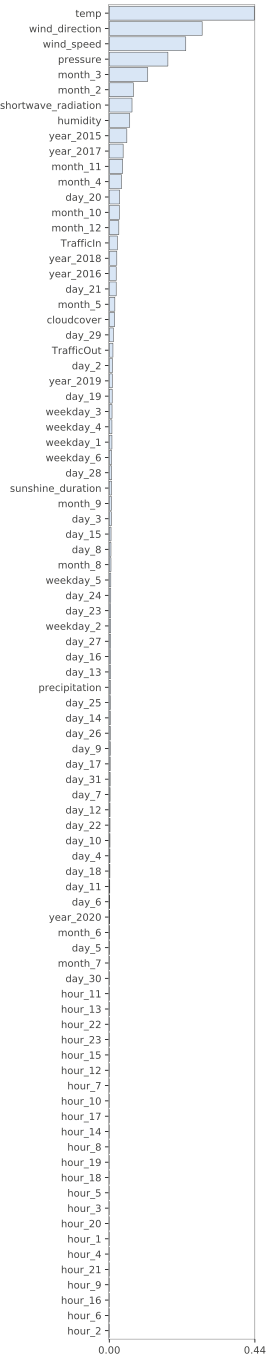

In [128]:
rfpimp.plot_importances(importance)